In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
# Dataset is now stored in a Pandas Dataframe
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [ ]:
df.shape

(88588, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
df = df.drop(columns=['date','time','username', 'gyro_x','gyro_y','gyro_z', 'wrist'])
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z
0,0,0.2650,-0.7814,-0.0076
1,0,0.6722,-1.1233,-0.2344
2,0,0.4399,-1.4817,0.0722
3,0,0.3031,-0.8125,0.0888
4,0,0.4814,-0.9312,0.0359


In [ ]:
categorical = [var for var in df.columns]
df[categorical].isnull().sum()

activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
dtype: int64

In [ ]:
df.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

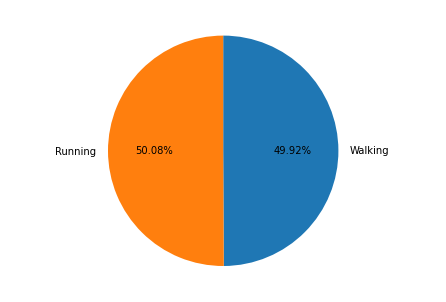

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Act = ['Walking', 'Running']
Total = [44223,44365]
ax.pie(Total,labels=Act, autopct='%1.2f%%', counterclock=False, startangle=90)
plt.show()

In [ ]:
dfwalk = df.query('activity == 0')
dfwalk

,activity,acceleration_x,acceleration_y,acceleration_z
0,0,0.2650,-0.7814,-0.0076
1,0,0.6722,-1.1233,-0.2344
2,0,0.4399,-1.4817,0.0722
3,0,0.3031,-0.8125,0.0888
4,0,0.4814,-0.9312,0.0359
...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327
88584,0,0.4977,-1.0027,-0.4397
88585,0,0.4587,-1.1780,-0.2827
88586,0,0.2590,-0.8582,-0.0759


In [ ]:
dfrun = df.query('activity == 1')
dfrun

,activity,acceleration_x,acceleration_y,acceleration_z
755,1,1.2842,0.0526,-0.2362
756,1,0.3057,0.4504,-0.1000
757,1,1.0601,-0.9857,-0.0732
758,1,-0.1065,-0.7203,0.2003
759,1,1.0069,0.3441,-0.2760
...,...,...,...,...
87750,1,0.4733,-0.8527,-1.1410
87751,1,0.0295,0.6734,-0.2263
87752,1,2.5963,-0.4055,-2.4827
87753,1,-0.5401,-0.3176,0.5294


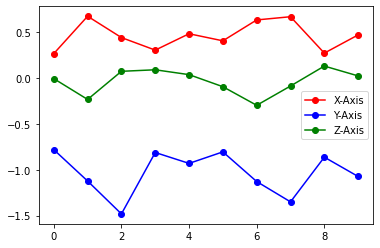

In [ ]:
# line 1 points
dfwalk = dfwalk.iloc[:10]
x1 = dfwalk["acceleration_x"]
y1 = dfwalk["acceleration_y"]
z1 = dfwalk["acceleration_z"]
# plotting the line 1 points
plt.plot(x1, label = "X-Axis", color='red', marker='o')
plt.plot(y1, label = "Y-Axis", color='blue', marker='o')
plt.plot(z1, label = "Z-Axis", color='green', marker='o')

# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

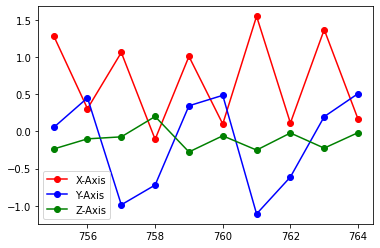

In [ ]:
# line 1 points
dfrun = dfrun.iloc[:10]
x1 = dfrun["acceleration_x"]
y1 = dfrun["acceleration_y"]
z1 = dfrun["acceleration_z"]
# plotting the line 1 points
plt.plot(x1, label = "X-Axis", color='red', marker='o')
plt.plot(y1, label = "Y-Axis", color='blue', marker='o')
plt.plot(z1, label = "Z-Axis", color='green', marker='o')

# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [ ]:
# Variable independen
x = df.drop(["activity"], axis = 1)
#variable dependen
y = df["activity"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape, x_test.shape

((70870, 3), (17718, 3))

In [ ]:
print(x_test)

       acceleration_x  acceleration_y  acceleration_z
76848          0.2932         -1.0885         -0.0103
41117         -0.2106         -0.9212         -0.2130
18385         -3.6553          0.3803          0.2062
65467          0.2211         -0.7562          0.0870
13797          0.1550         -0.5223          0.1360
...               ...             ...             ...
1746           1.4289         -0.7710         -0.9980
7650          -0.2244         -0.7382         -0.1273
61758          0.5932         -0.9969         -0.6339
39284         -0.3354         -1.4499         -0.3625
77659          0.1832         -0.8590         -0.0398

[17718 rows x 3 columns]


In [ ]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([35329., 35541.])

In [ ]:
# predict the target on the train dataset
predict_train = modelnb.predict(x_train)
print('Target on train data',predict_train)

Target on train data [1 0 1 ... 0 0 1]


In [ ]:
# Accuray Score on train dataset
y_pred = nbtrain.predict(x_test)
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9574290955270213


In [ ]:
predict_test = modelnb.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [0 0 1 ... 1 0 0]


In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9576701659329495


In [ ]:
print('Training set score: {:.4f}'.format(modelnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelnb.score(x_test, y_test)))

Training set score: 0.9574
Test set score: 0.9577


In [ ]:
data=[[0.2143,	-0.5000,	-0.1000]]
ypredic = nbtrain.predict(data)
print(ypredic)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8834   60]
 [ 690 8134]]

True Positives(TP) =  8834

True Negatives(TN) =  8134

False Positives(FP) =  60

False Negatives(FN) =  690


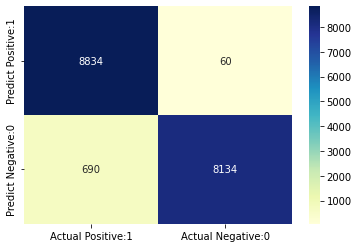

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9577


In [ ]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0423
